# Logistic Regression Models

In [2]:
%matplotlib inline
import numpy as np
from cross_validation import cross_validation
from polynomial import build_poly
import matplotlib.pyplot as plt
from implementations import logistic_regression
from proj1_helpers import predict_labels
from cross_validation import accuracy

In [3]:
X_train = np.load("X_train_normalized.npy")
y_train = np.load("y_train_10.npy")
print(X_train.shape)
print(y_train.shape)

(250000, 14)
(250000,)


# Splitting into 3 subsets

We split the dataset using PRI_jet_num column

In [4]:
X_pri_0 = X_train[(X_train[:, -2] == 0), :]
X_pri_1 = X_train[(X_train[:, -2] == 1), :]
X_pri_23 = X_train[(X_train[:, -2] == 2) | (X_train[:, -2] == 3), :]

y_pri_0 = y_train[(X_train[:, -2] == 0)]
y_pri_1 = y_train[(X_train[:, -2] == 1)]
y_pri_23 = y_train[(X_train[:, -2] == 2) | (X_train[:, -2] == 3)]

print("PRI_0: {}".format(X_pri_0.shape))
print("PRI_1: {}".format(X_pri_1.shape))
print("PRI_23: {}".format(X_pri_23.shape))

print("\ny_PRI_0: {}".format(y_pri_0.shape))
print("y_PRI_1: {}".format(y_pri_1.shape))
print("y_PRI_23: {}".format(y_pri_23.shape))

PRI_0: (99913, 14)
PRI_1: (77544, 14)
PRI_23: (72543, 14)

y_PRI_0: (99913,)
y_PRI_1: (77544,)
y_PRI_23: (72543,)


In [5]:
X_pri_0 = np.delete(X_pri_0, np.s_[12], axis=1)
X_pri_1 = np.delete(X_pri_1, np.s_[12], axis=1)
X_pri_23 = np.delete(X_pri_23, np.s_[12], axis=1)

print("PRI_0: {}".format(X_pri_0.shape))
print("PRI_1: {}".format(X_pri_1.shape))
print("PRI_23: {}".format(X_pri_23.shape))

PRI_0: (99913, 13)
PRI_1: (77544, 13)
PRI_23: (72543, 13)


In [6]:
selected_features = np.array([1,3,9,10,11,13,21,22])
selected_features = np.sort(np.append(selected_features, [0,4,5,6,12]))
print(selected_features)

[ 0  1  3  4  5  6  9 10 11 12 13 21 22]


In [7]:
delete_columns_0 = []

for i in range(X_pri_0.shape[1]):
    if np.isin(True, (X_pri_0[:,i] == -999)):
        delete_columns_0.append(i)
        
delete_columns_0

[3, 4, 5, 9, 12]

In [8]:
delete_columns_1 = []

for i in range(X_pri_1.shape[1]):
    if np.isin(True, (X_pri_1[:,i] == -999)):
        delete_columns_1.append(i)
        
delete_columns_1

[3, 4, 5, 9]

In [9]:
X_pri_0 = np.delete(X_pri_0, np.s_[delete_columns_0], axis=1)  
X_pri_0.shape

(99913, 8)

In [10]:
X_pri_1 = np.delete(X_pri_1, np.s_[delete_columns_1], axis=1)  
X_pri_1.shape

(77544, 9)

In [11]:
print("PRI_0: {}".format(X_pri_0.shape))
print("PRI_1: {}".format(X_pri_1.shape))
print("PRI_23: {}".format(X_pri_23.shape))

PRI_0: (99913, 8)
PRI_1: (77544, 9)
PRI_23: (72543, 13)


# Logistic Regression Models w/ Gradient Descent for 3 subsets

In [12]:
degrees = [10]
max_iter = [1000]
gamma = np.logspace(-6,-1,6)
print(gamma)
pars = {'degrees': degrees,
       'max_iter': max_iter,
       'gamma': gamma}

[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]


# Model training

Degrees are selected in accordance with the results in the Least Squares method. Appropriate gamma values are selected here.

### Training for PRI_0 subset

degree=10, gamma=1e-4

In [13]:
pri0_tr_acc, pri0_te_acc = cross_validation(y_pri_0, X_pri_0, 3, h_pars=pars, model='log')

deg:10-itr:1000-gam:1e-06 completed
deg:10-itr:1000-gam:1e-05 completed
deg:10-itr:1000-gam:0.0001 completed


/Users/canaltinigne/Desktop/ml_project_1/code/errors.py:15: RuntimeWarning: divide by zero encountered in log
  return (-1*np.mean(np.add(np.multiply(y,np.log(pred)), np.multiply((1-y),np.log(1-pred)))) + lambda_*np.dot(w.T, w)).flatten()[0]  #Also works for regularized logistic regression when lambda_ > 0
/Users/canaltinigne/Desktop/ml_project_1/code/errors.py:15: RuntimeWarning: invalid value encountered in multiply
  return (-1*np.mean(np.add(np.multiply(y,np.log(pred)), np.multiply((1-y),np.log(1-pred)))) + lambda_*np.dot(w.T, w)).flatten()[0]  #Also works for regularized logistic regression when lambda_ > 0


deg:10-itr:1000-gam:0.001 completed


/Users/canaltinigne/Desktop/ml_project_1/code/gradient.py:10: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))


deg:10-itr:1000-gam:0.01 completed
deg:10-itr:1000-gam:0.1 completed


In [14]:
pri0_te_acc 

array([[1.00000000e+03, 1.00000000e-06, 1.00000000e+01, 7.51130995e-01],
       [1.00000000e+03, 1.00000000e-05, 1.00000000e+01, 7.77133878e-01],
       [1.00000000e+03, 1.00000000e-04, 1.00000000e+01, 8.07150292e-01],
       [1.00000000e+03, 1.00000000e-03, 1.00000000e+01, 7.57386500e-01],
       [1.00000000e+03, 1.00000000e-02, 1.00000000e+01, 7.40131316e-01],
       [1.00000000e+03, 1.00000000e-01, 1.00000000e+01, 5.95353911e-01]])

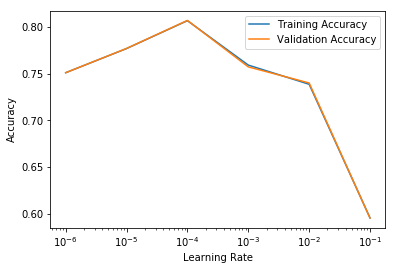

In [18]:
plt.plot(pri0_tr_acc[:,1], pri0_tr_acc[:,3], label='Training Accuracy')
plt.plot(pri0_te_acc[:,1], pri0_te_acc[:,3], label='Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()

If we set learning rate as 1e-4, then there will be some problems. So we used 1e-5 as learning rate.

In [31]:
degrees = [10]
max_iter = [10000]
gamma = [1e-4]

pars = {'degrees': degrees,
       'max_iter': max_iter,
       'gamma': gamma}

In [32]:
pri0_tr_acc, pri0_te_acc = cross_validation(y_pri_0, X_pri_0, 3, h_pars=pars, model='log')

deg:10-itr:10000-gam:0.0001 completed


In [33]:
pri0_te_acc[0,3]

0.8187505004403876

In [36]:
np.random.seed(23)
initial_w = np.random.normal(0,1,build_poly(X_pri_0, 10).shape[1]).reshape(-1,1)#

w, losses = logistic_regression(y_pri_0, build_poly(X_pri_0,10), initial_w, 10000, 1e-4)

Text(0,0.5,'Log Loss')

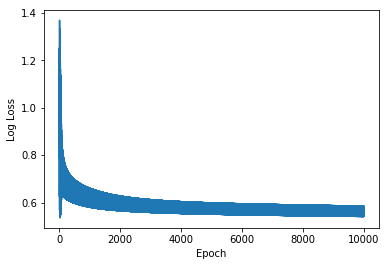

In [37]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Log Loss')

### Training for PRI_1 subset

degree=9, gamma = 1e-5

In [19]:
degrees = [9]

pars = {'degrees': degrees,
       'max_iter': max_iter,
       'gamma': gamma}

In [20]:
pri1_tr_acc, pri1_te_acc = cross_validation(y_pri_1, X_pri_1, 3, h_pars=pars, model='log')

deg:9-itr:1000-gam:1e-06 completed
deg:9-itr:1000-gam:1e-05 completed
deg:9-itr:1000-gam:0.0001 completed


/Users/canaltinigne/Desktop/ml_project_1/code/errors.py:15: RuntimeWarning: divide by zero encountered in log
  return (-1*np.mean(np.add(np.multiply(y,np.log(pred)), np.multiply((1-y),np.log(1-pred)))) + lambda_*np.dot(w.T, w)).flatten()[0]  #Also works for regularized logistic regression when lambda_ > 0
/Users/canaltinigne/Desktop/ml_project_1/code/errors.py:15: RuntimeWarning: invalid value encountered in multiply
  return (-1*np.mean(np.add(np.multiply(y,np.log(pred)), np.multiply((1-y),np.log(1-pred)))) + lambda_*np.dot(w.T, w)).flatten()[0]  #Also works for regularized logistic regression when lambda_ > 0


deg:9-itr:1000-gam:0.001 completed


/Users/canaltinigne/Desktop/ml_project_1/code/gradient.py:10: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))


deg:9-itr:1000-gam:0.01 completed
deg:9-itr:1000-gam:0.1 completed


In [21]:
pri1_te_acc

array([[1.00000000e+03, 1.00000000e-06, 9.00000000e+00, 6.50998143e-01],
       [1.00000000e+03, 1.00000000e-05, 9.00000000e+00, 6.97126793e-01],
       [1.00000000e+03, 1.00000000e-04, 9.00000000e+00, 6.09021975e-01],
       [1.00000000e+03, 1.00000000e-03, 9.00000000e+00, 5.92295987e-01],
       [1.00000000e+03, 1.00000000e-02, 9.00000000e+00, 5.91922006e-01],
       [1.00000000e+03, 1.00000000e-01, 9.00000000e+00, 5.91844630e-01]])

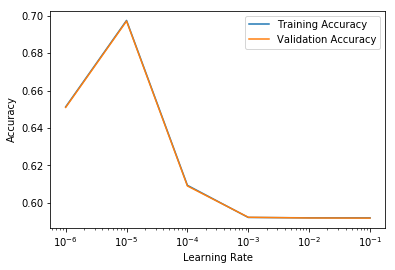

In [22]:
plt.plot(pri1_tr_acc[:,1], pri1_tr_acc[:,3], label='Training Accuracy')
plt.plot(pri1_te_acc[:,1], pri1_te_acc[:,3], label='Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()

In [38]:
degrees = [9]
max_iter = [10000]
gamma = [1e-5]

pars = {'degrees': degrees,
       'max_iter': max_iter,
       'gamma': gamma}

In [39]:
pri1_tr_acc, pri1_te_acc = cross_validation(y_pri_1, X_pri_1, 3, h_pars=pars, model='log')

deg:9-itr:10000-gam:1e-05 completed


In [43]:
pri1_te_acc[0,3]

0.7086170432270711

In [44]:
np.random.seed(23)
initial_w = np.random.normal(0,1,build_poly(X_pri_1, 9).shape[1]).reshape(-1,1)#

w, losses = logistic_regression(y_pri_1, build_poly(X_pri_1,9), initial_w, 10000, 1e-5)

Text(0,0.5,'Log Loss')

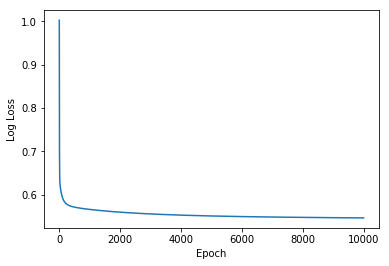

In [45]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Log Loss')

### Training for PRI_23 subset

degree=10, gamma=1e-5

In [23]:
degrees = [10]

pars = {'degrees': degrees,
       'max_iter': max_iter,
       'gamma': gamma}

In [24]:
pri23_tr_acc, pri23_te_acc = cross_validation(y_pri_23, X_pri_23, 3, h_pars=pars, model='log')

deg:10-itr:1000-gam:1e-06 completed
deg:10-itr:1000-gam:1e-05 completed
deg:10-itr:1000-gam:0.0001 completed


/Users/canaltinigne/Desktop/ml_project_1/code/errors.py:15: RuntimeWarning: divide by zero encountered in log
  return (-1*np.mean(np.add(np.multiply(y,np.log(pred)), np.multiply((1-y),np.log(1-pred)))) + lambda_*np.dot(w.T, w)).flatten()[0]  #Also works for regularized logistic regression when lambda_ > 0
/Users/canaltinigne/Desktop/ml_project_1/code/errors.py:15: RuntimeWarning: invalid value encountered in multiply
  return (-1*np.mean(np.add(np.multiply(y,np.log(pred)), np.multiply((1-y),np.log(1-pred)))) + lambda_*np.dot(w.T, w)).flatten()[0]  #Also works for regularized logistic regression when lambda_ > 0


deg:10-itr:1000-gam:0.001 completed


/Users/canaltinigne/Desktop/ml_project_1/code/gradient.py:10: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))


deg:10-itr:1000-gam:0.01 completed
deg:10-itr:1000-gam:0.1 completed


In [25]:
pri23_te_acc

array([[1.00000000e+03, 1.00000000e-06, 1.00000000e+01, 6.95876928e-01],
       [1.00000000e+03, 1.00000000e-05, 1.00000000e+01, 7.12708325e-01],
       [1.00000000e+03, 1.00000000e-04, 1.00000000e+01, 6.11664806e-01],
       [1.00000000e+03, 1.00000000e-03, 1.00000000e+01, 6.08259929e-01],
       [1.00000000e+03, 1.00000000e-02, 1.00000000e+01, 6.08342638e-01],
       [1.00000000e+03, 1.00000000e-01, 1.00000000e+01, 6.08342638e-01]])

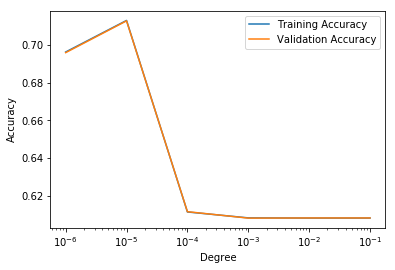

In [26]:
plt.plot(pri23_tr_acc[:,1], pri23_tr_acc[:,3], label='Training Accuracy')
plt.plot(pri23_te_acc[:,1], pri23_te_acc[:,3], label='Validation Accuracy')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()

In [49]:
degrees = [10]
max_iter = [10000]
gamma = [1e-5]

pars = {'degrees': degrees,
       'max_iter': max_iter,
       'gamma': gamma}

In [50]:
pri23_tr_acc, pri23_te_acc = cross_validation(y_pri_23, X_pri_23, 3, h_pars=pars, model='log')

deg:10-itr:10000-gam:1e-05 completed


In [51]:
pri23_te_acc[0,3]

0.7273754876418125

In [52]:
np.random.seed(23)
initial_w = np.random.normal(0,1,build_poly(X_pri_1, 10).shape[1]).reshape(-1,1)#

w, losses = logistic_regression(y_pri_1, build_poly(X_pri_1,10), initial_w, 10000, 1e-5)

Text(0,0.5,'Log Loss')

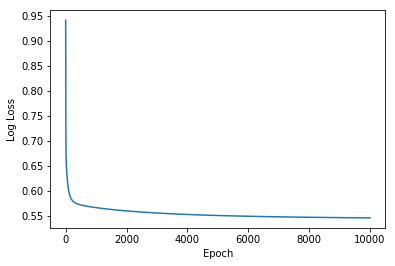

In [53]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Log Loss')

# Logistic Regession - Validation Set Accuracy

In [54]:
np.mean([pri23_te_acc[0,3],
        pri1_te_acc[0,3],
        pri0_te_acc[0,3]])

0.7515810104364237